#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/competitions/desafio-de-prediccion-de-precios-de-portatiles

## Librerias

In [1]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib
from pylab import *
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from bootcampviztools import *
import urllib.request
from PIL import Image

## Data

In [2]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv('train.csv', index_col=0)

## Data exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 268 to 1179
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 99.8+ KB


In [4]:
for column in df.columns:
    print(f"Columna: {column}")
    print(df[column].value_counts())
    print("\n")
    
pd.set_option('display.max_rows', None)
df['Cpu'].value_counts()

Columna: laptop_ID
laptop_ID
1002    1
945     1
374     1
158     1
960     1
       ..
691     1
632     1
1246    1
1240    1
1313    1
Name: count, Length: 912, dtype: int64


Columna: Company
Company
Lenovo       208
Dell         207
HP           189
Asus         108
Acer          75
Toshiba       37
MSI           34
Apple         17
Mediacom       7
Razer          6
Samsung        6
Fujitsu        3
Microsoft      3
Vero           3
Xiaomi         3
Google         2
Chuwi          2
LG             1
Huawei         1
Name: count, dtype: int64


Columna: Product
Product
Inspiron 3567                                21
XPS 13                                       20
250 G6                                       19
Vostro 3568                                  16
Inspiron 5570                                11
                                             ..
Elitebook Folio                               1
Q304UA-BHI5T11 (i5-7200U/6GB/1TB/FHD/W10)     1
ThinkPad T470p                     

Cpu
Intel Core i5 7200U 2.5GHz               142
Intel Core i7 7700HQ 2.8GHz              102
Intel Core i7 7500U 2.7GHz                88
Intel Core i5 8250U 1.6GHz                54
Intel Core i5 6200U 2.3GHz                51
Intel Core i3 6006U 2GHz                  47
Intel Core i7 8550U 1.8GHz                44
Intel Core i7 6500U 2.5GHz                34
Intel Core i3 7100U 2.4GHz                29
Intel Core i7 6700HQ 2.6GHz               28
Intel Celeron Dual Core N3350 1.1GHz      22
Intel Celeron Dual Core N3060 1.6GHz      20
Intel Core i5 7300HQ 2.5GHz               19
Intel Pentium Quad Core N4200 1.1GHz      12
Intel Core i7 6600U 2.6GHz                12
Intel Pentium Quad Core N3710 1.6GHz      10
Intel Core i3 6006U 2.0GHz                10
Intel Core i7 7600U 2.8GHz                 9
Intel Core i5 6300U 2.4GHz                 9
Intel Celeron Dual Core N3050 1.6GHz       8
Intel Core i5 7300U 2.6GHz                 7
AMD A9-Series 9420 3GHz                    7
Intel 

## Data processing

In [5]:
""" df['GPU_Brand'] = df['Gpu'].str.split().str[0]
df['CPU_Brand'] = df['Cpu'].str.split().str[0] """

" df['GPU_Brand'] = df['Gpu'].str.split().str[0]\ndf['CPU_Brand'] = df['Cpu'].str.split().str[0] "

In [6]:
""" def transform_memory_column(df):
    # Crear columnas separadas para cada tipo de almacenamiento
    storage_types = ['SSD', 'HDD', 'Flash Storage', 'Hybrid']
    for storage_type in storage_types:
        df[storage_type] = df['Memory'].apply(lambda x: 1 if storage_type in x else 0)

    # Dividir la columna "Memory" en capacidades y tipos de almacenamiento
    memory_parts = df['Memory'].str.split('+').apply(lambda x: [part.strip() for part in x])
    
    capacities = []
    storage_categories = []
    for memory_part in memory_parts:
        for part in memory_part:
            if any(storage_type in part for storage_type in storage_types):
                storage_categories.append(part)
            else:
                capacities.append(part)

    # Asignar un valor numérico a cada tipo de almacenamiento
    storage_mapping = {storage_type: i+1 for i, storage_type in enumerate(storage_types)}

    # Crear columnas para las capacidades de almacenamiento
    if capacities:
        df['Capacity'] = capacities
        df['Capacity'] = df['Capacity'].str.extract(r'(\d+)').astype(int)
        df['Capacity_GB'] = df['Capacity']
    else:
        df['Capacity_GB'] = 0

    # Aplicar get_dummies a la columna de tipos de almacenamiento
    storage_dummies = pd.get_dummies(storage_categories)

    # Concatenar las columnas de tipos de almacenamiento dummy al DataFrame original
    df = pd.concat([df, storage_dummies], axis=1)

    # Eliminar la columna 'Memory' ya que no es necesaria
    df.drop(columns=['Memory'], inplace=True)

    return df """

' def transform_memory_column(df):\n    # Crear columnas separadas para cada tipo de almacenamiento\n    storage_types = [\'SSD\', \'HDD\', \'Flash Storage\', \'Hybrid\']\n    for storage_type in storage_types:\n        df[storage_type] = df[\'Memory\'].apply(lambda x: 1 if storage_type in x else 0)\n\n    # Dividir la columna "Memory" en capacidades y tipos de almacenamiento\n    memory_parts = df[\'Memory\'].str.split(\'+\').apply(lambda x: [part.strip() for part in x])\n    \n    capacities = []\n    storage_categories = []\n    for memory_part in memory_parts:\n        for part in memory_part:\n            if any(storage_type in part for storage_type in storage_types):\n                storage_categories.append(part)\n            else:\n                capacities.append(part)\n\n    # Asignar un valor numérico a cada tipo de almacenamiento\n    storage_mapping = {storage_type: i+1 for i, storage_type in enumerate(storage_types)}\n\n    # Crear columnas para las capacidades de almac

In [7]:
""" df = transform_memory_column(df) """

' df = transform_memory_column(df) '

In [8]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
df['Ram'] = df['Ram'].str.replace('GB', '').astype(float)

In [9]:
def transform_memory(memory):
    # Convertir todo a minúsculas para evitar problemas de capitalización
    memory = memory.lower()
    
    # Inicializar las capacidades
    ssd_capacity = 0
    hdd_capacity = 0
    flash_capacity = 0
    hybrid_capacity = 0
    
    # Buscar las capacidades en la memoria
    ssd_match = re.search(r'(\d+)gb\s+ssd', memory)
    hdd_match = re.search(r'(\d+)tb\s+hdd', memory)
    flash_match = re.search(r'(\d+)gb\s+flash\s+storage', memory)
    hybrid_match = re.search(r'(\d+\.\d+)tb\s+hybrid', memory)
    
    # Extraer las capacidades si están presentes
    if ssd_match:
        ssd_capacity = int(ssd_match.group(1))
    if hdd_match:
        hdd_capacity = int(hdd_match.group(1)) * 1000  # Convertir de TB a GB
    if flash_match:
        flash_capacity = int(flash_match.group(1))
    if hybrid_match:
        hybrid_capacity = int(float(hybrid_match.group(1)) * 1000)  # Convertir de TB a GB
    
    return ssd_capacity, hdd_capacity, flash_capacity, hybrid_capacity


df['SSD_capacity'], df['HDD_capacity'], df['Flash_capacity'], df['Hybrid_capacity'] = zip(*df['Memory'].apply(transform_memory))

In [10]:
def transform_gpu(gpu):
    manufacter_codes = {'Intel': 1, 'Nvidia': 2, 'AMD': 3}
    
    # Identificar el fabricante
    if 'AMD' in gpu:
        manufacter = 'AMD'
    elif 'Intel' in gpu:
        manufacter = 'Intel'
    elif 'Nvidia' in gpu:
        manufacter = 'Nvidia'
    else:
        manufacter = 'Unknown'
    
    # Extraer las partes de la GPU
    parts = gpu.split(' ')
    series = ' '.join(parts[1:-1]) if len(parts) > 2 else 'Unknown'
    numero_modelo = re.findall(r'\d+', gpu)
    numero_modelo = numero_modelo[0] if numero_modelo else '0'
    
    # Obtener el código del fabricante
    codigo_gpu = manufacter_codes.get(manufacter, 0)
    
    return manufacter, series, numero_modelo, codigo_gpu

df['Gpu_manufacter'], df['Gpu_series'], df['Gpu_numero'], df['Gpu_codigo'] = zip(*df['Gpu'].apply(transform_gpu))

In [11]:
def transform_cpu(cpu):
    # Convertir todos los nombres de CPU a minúsculas para evitar problemas de capitalización
    cpu = cpu.lower()
    
    # Diccionario para asignar códigos a fabricantes
    manufacter_codes = {'intel': 1, 'amd': 2}
    
    # Identificar el fabricante
    manufacter = 'Unknown'
    for key in manufacter_codes:
        if key in cpu:
            manufacter = key
            break
    
    # Extraer serie y número de la CPU
    serie_numero_match = re.search(r'([a-zA-Z]+\s?\d+)', cpu)
    serie_numero = serie_numero_match.group(0) if serie_numero_match else 'Unknown'
    
    velocidad_reloj_match = re.search(r'\d+\.?\d*ghz', cpu)
    velocidad_reloj_str = velocidad_reloj_match.group(0) if velocidad_reloj_match else 'Unknown'
    
    # Formatear la velocidad del reloj a un decimal
    velocidad_reloj_decimal = round(float(re.search(r'\d+\.?\d*', velocidad_reloj_str).group(0)), 1)
    
    # Obtener el código del fabricante
    codigo_fabricante = manufacter_codes.get(manufacter, 0)
    
    return manufacter, serie_numero, velocidad_reloj_decimal, codigo_fabricante

df['Cpu_manufacturer'], df['Cpu_series'], df['Cpu_clock_speed'], df['Cpu_code'] = zip(*df['Cpu'].apply(transform_cpu))

In [12]:
resolution_categories = {
    'HD': 1,
    'Full HD': 2,
    'Quad HD+': 3,
    '4K Ultra HD': 4
}

def assign_resolution_value(resolution):
    if isinstance(resolution, str):  # Verificar si la resolución es una cadena
        for category, value in resolution_categories.items():
            if category in resolution:
                return value
    return 0   # Si la resolución no coincide con ninguna categoría, asigna 0

# Define una función para extraer la resolución horizontal y vertical
def extract_resolution(resolution, axis):
    if isinstance(resolution, float):
        return 0  # Si es NaN, devuelve 0
    parts = str(resolution).split('x')
    if axis == 'horizontal':
        for part in parts:
            if part.strip().isdigit():
                return int(part.strip())  # Extraer el número si es un dígito
        return 0
    elif axis == 'vertical':
        return int(parts[-1])
    else:
        return 0

def has_ips_panel(screen_description):
    if isinstance(screen_description, float):
        return 0
    return 1 if 'IPS' in screen_description else 0
    
print(df['ScreenResolution'].apply(type).value_counts())
df['ResolutionValue'] = df['ScreenResolution'].apply(assign_resolution_value)

# Crea nuevas características para la resolución horizontal y vertical
df['HorizontalResolution'] = df['ScreenResolution'].apply(lambda x: extract_resolution(x, 'horizontal'))
df['VerticalResolution'] = df['ScreenResolution'].apply(lambda x: extract_resolution(x, 'vertical'))
df['IPS_Panel'] = df['ScreenResolution'].apply(has_ips_panel)

ScreenResolution
<class 'str'>    912
Name: count, dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 268 to 1179
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   laptop_ID             912 non-null    int64  
 1   Company               912 non-null    object 
 2   Product               912 non-null    object 
 3   TypeName              912 non-null    object 
 4   Inches                912 non-null    float64
 5   ScreenResolution      912 non-null    object 
 6   Cpu                   912 non-null    object 
 7   Ram                   912 non-null    float64
 8   Memory                912 non-null    object 
 9   Gpu                   912 non-null    object 
 10  OpSys                 912 non-null    object 
 11  Weight                912 non-null    float64
 12  Price_euros           912 non-null    float64
 13  SSD_capacity          912 non-null    int64  
 14  HDD_capacity          912 non-null    int64  
 15  Flash_capacity        912

In [14]:
columnas_a_eliminar = ['Cpu', 'Gpu', 'ScreenResolution', 'Memory', 'Product', 'laptop_ID']

# Eliminar las columnas originales
df.drop(columnas_a_eliminar, axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 268 to 1179
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               912 non-null    object 
 1   TypeName              912 non-null    object 
 2   Inches                912 non-null    float64
 3   Ram                   912 non-null    float64
 4   OpSys                 912 non-null    object 
 5   Weight                912 non-null    float64
 6   Price_euros           912 non-null    float64
 7   SSD_capacity          912 non-null    int64  
 8   HDD_capacity          912 non-null    int64  
 9   Flash_capacity        912 non-null    int64  
 10  Hybrid_capacity       912 non-null    int64  
 11  Gpu_manufacter        912 non-null    object 
 12  Gpu_series            912 non-null    object 
 13  Gpu_numero            912 non-null    object 
 14  Gpu_codigo            912 non-null    int64  
 15  Cpu_manufacturer      912

In [16]:
object_columns = df.select_dtypes(include=['object']).columns

# Aplicar get dummies a las columnas object
df = pd.get_dummies(df, columns=object_columns)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 268 to 1179
Columns: 167 entries, Inches to Cpu_series_z8350
dtypes: bool(152), float64(5), int64(10)
memory usage: 249.4 KB


In [18]:
df['Cpu_clock_speed'].value_counts()

Cpu_clock_speed
2.5    208
2.8    114
2.7    107
1.6     98
2.3     65
2.0     58
1.8     48
2.6     47
1.1     40
2.4     40
2.9     15
3.0     13
1.4     11
1.2     10
1.5      8
2.2      8
1.3      6
3.6      4
3.1      3
2.1      3
0.9      2
1.9      2
1.0      1
3.2      1
Name: count, dtype: int64

In [19]:
df['HorizontalResolution'].value_counts()

HorizontalResolution
1080    579
1366    208
2160     34
768      21
1440     21
1800     18
1600     18
1200      5
1504      3
1920      3
2560      2
Name: count, dtype: int64

In [20]:
df['VerticalResolution'].value_counts()

VerticalResolution
1080    582
768     229
2160     34
1440     21
1800     18
900      13
1600      7
1200      5
1504      3
Name: count, dtype: int64

In [21]:
df['IPS_Panel'].value_counts()

IPS_Panel
0    653
1    259
Name: count, dtype: int64

-----------------------------------------------------------------------------------------------------------------

## Pasos que si o si debéis realizar para poder participar en la competición:

### 1. Definir X e y

In [22]:
y = df['Price_euros']

In [23]:
X = df.drop(columns=['Price_euros'])

### 2. Dividir X_train, X_test, y_train, y_test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Crear y entrenar el modelo


### 4. Sacar métricas, valorar el modelo 

Recuerda que en la competición se va a evaluar con la métrica de MAE.

In [25]:
y_train
X_train['Price_euros'] = y_train

Index(['Inches', 'Ram', 'Weight', 'SSD_capacity', 'HDD_capacity',
       'Flash_capacity', 'Hybrid_capacity', 'Gpu_codigo', 'Cpu_clock_speed',
       'Cpu_code', 'ResolutionValue', 'HorizontalResolution',
       'VerticalResolution', 'IPS_Panel', 'Price_euros'],
      dtype='object')
                        Inches       Ram    Weight  SSD_capacity  \
Inches                1.000000  0.265210  0.826690     -0.092982   
Ram                   0.265210  1.000000  0.447989      0.442727   
Weight                0.826690  0.447989  1.000000     -0.038735   
SSD_capacity         -0.092982  0.442727 -0.038735      1.000000   
HDD_capacity          0.460228  0.215663  0.466640     -0.298337   
Flash_capacity       -0.234956 -0.057966 -0.173968     -0.159384   
Hybrid_capacity       0.073031  0.069570  0.133444     -0.058477   
Gpu_codigo            0.489399  0.217442  0.453723     -0.017205   
Cpu_clock_speed       0.284174  0.372348  0.324351      0.256505   
Cpu_code              0.117223 -0.0

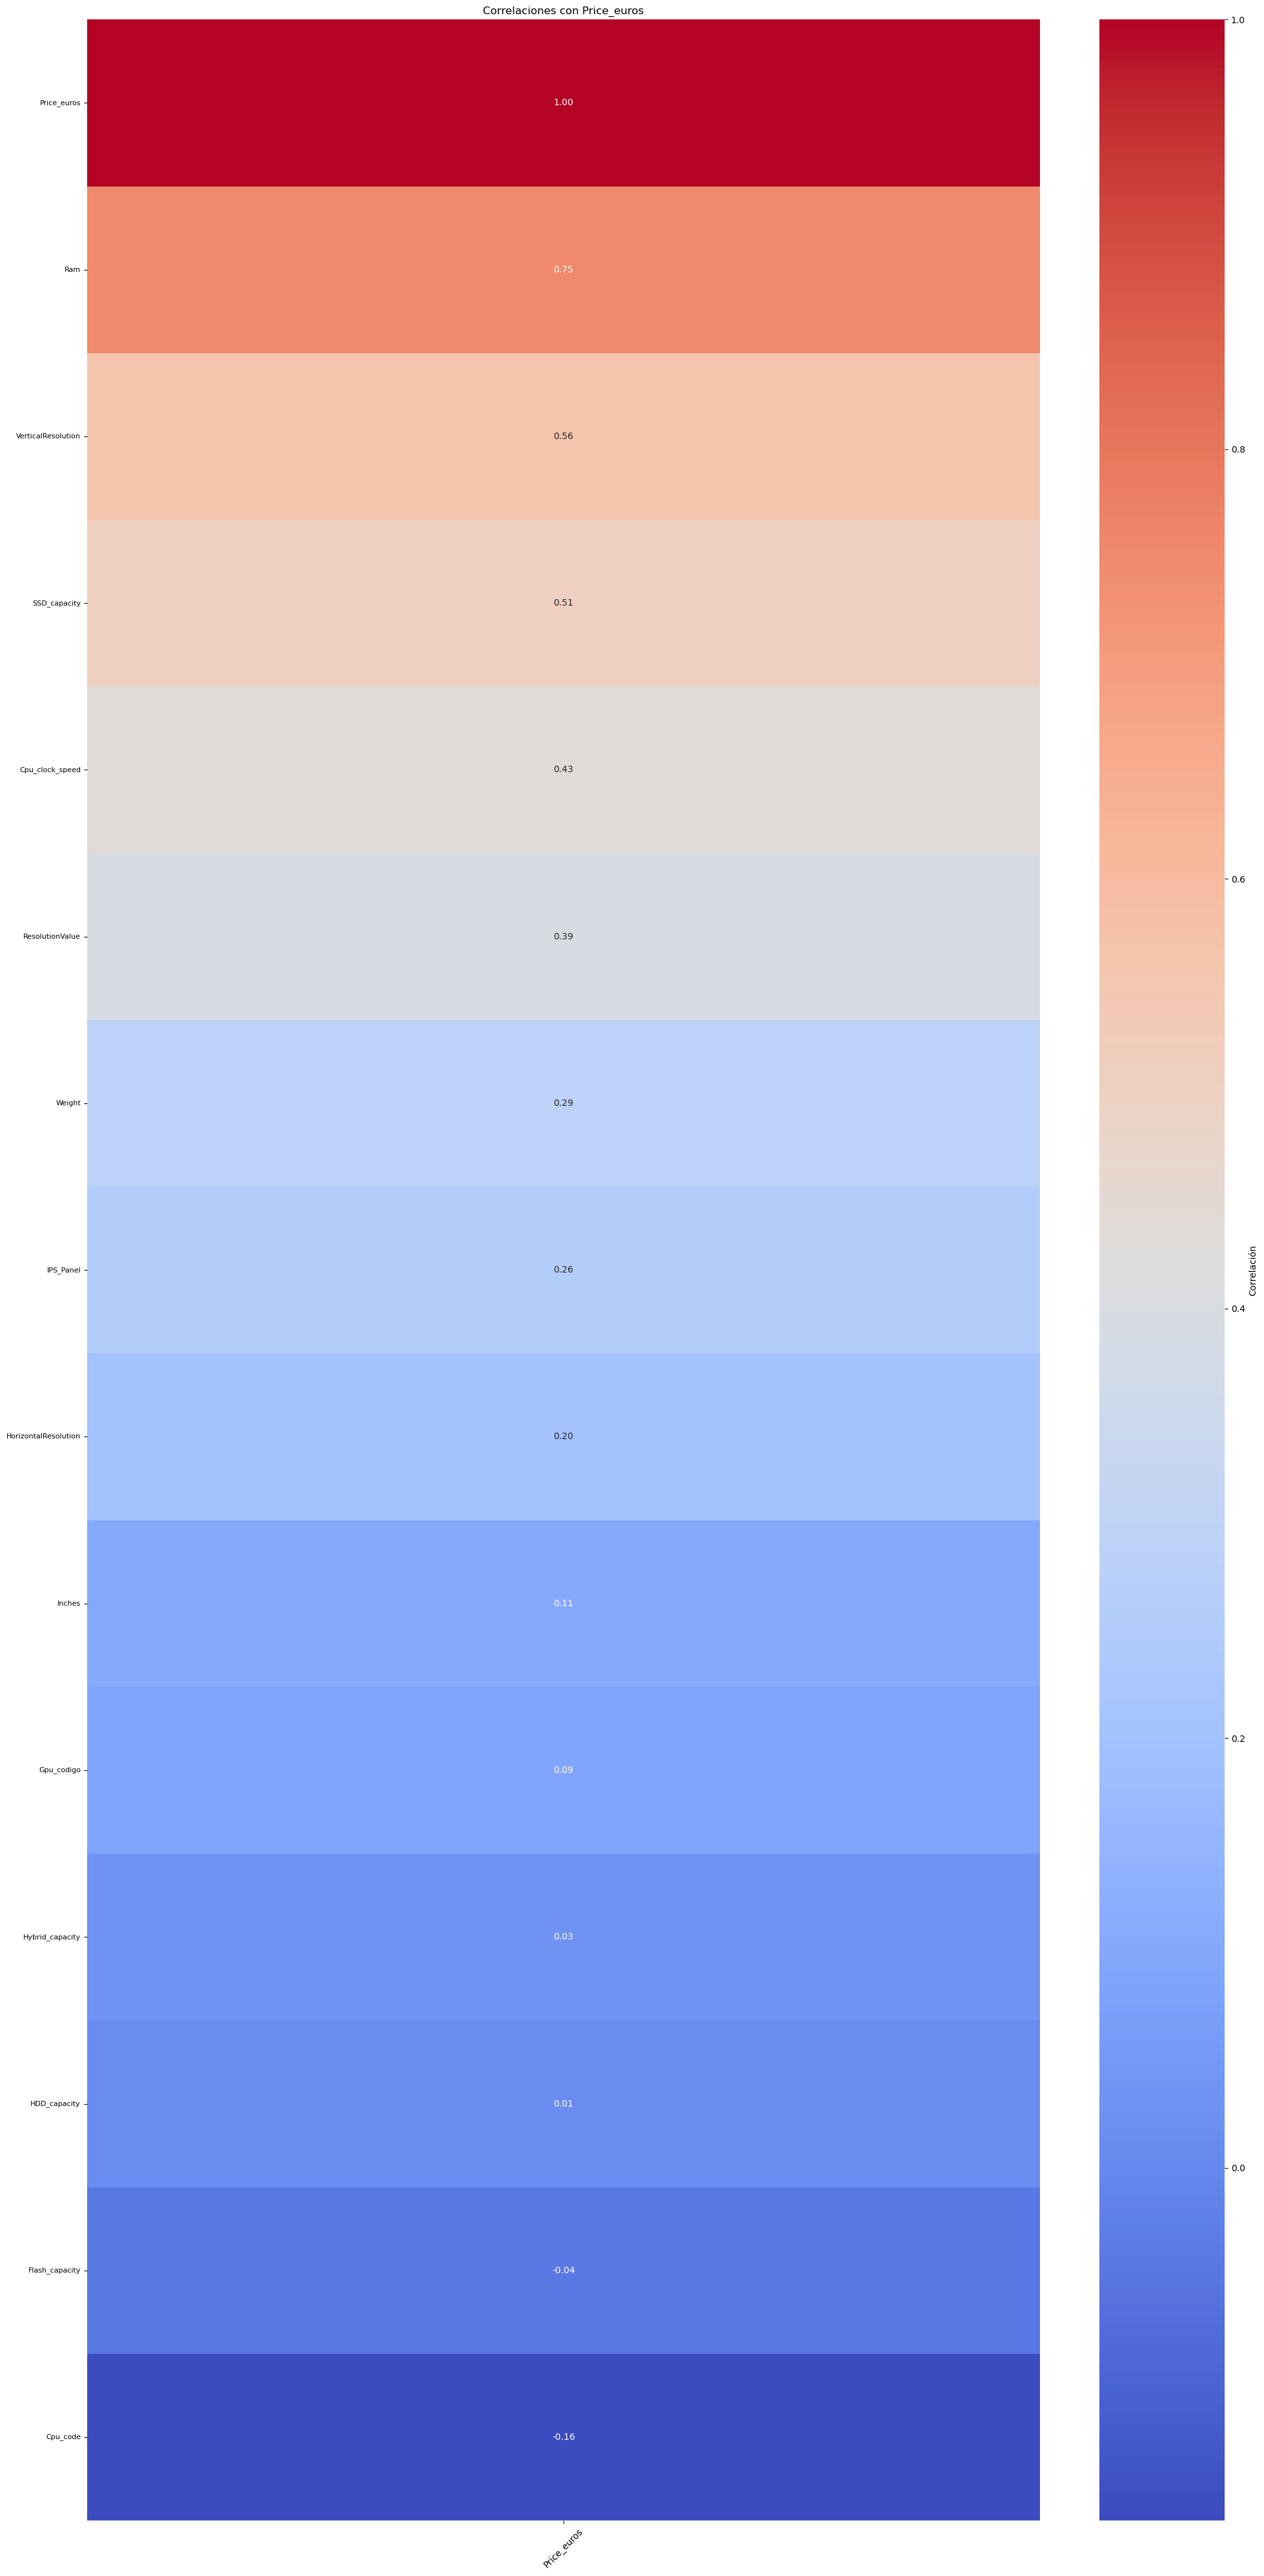

In [26]:
numerical_df = X_train.select_dtypes(include=['int64', 'int32', 'float64'])

# Verificar las columnas seleccionadas
print(numerical_df.columns)

# Calcular la matriz de correlación
correlation_matrix = numerical_df.corr()

# Mostrar la matriz de correlación completa
print(correlation_matrix)

# Extraer las correlaciones con 'Price_euros'
price_correlations = correlation_matrix['Price_euros'].sort_values(ascending=False)
print(price_correlations)

significant_correlations = price_correlations[price_correlations > 0].index.tolist()

# Crear una visualización de la matriz de correlación enfocada en 'Price_euros'
plt.figure(figsize=(20, 40))  # Ajusta el tamaño de la figura
sns.heatmap(correlation_matrix[['Price_euros']].sort_values(by='Price_euros', ascending=False), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlación'})
plt.title('Correlaciones con Price_euros')
plt.xticks(rotation=45)
plt.yticks(rotation=0, size=8)  # Ajusta el tamaño de las etiquetas
plt.tight_layout()
plt.show()

In [27]:
significant_correlations.remove('Price_euros')

In [28]:
features =['Inches', 'CPU_Brand_Intel', 'Weight', 'GPU_Brand_Nvidia']

X_train_mod_final = X_train[significant_correlations] 
X_test_mod_final = X_test[significant_correlations] 

-----------------------------------------------------------------

In [29]:
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0)
}

In [30]:
best_mae = float('inf')
best_model = None
best_model_name = ""
best_params = None

for name, model in models.items():
    model.fit(X_train_mod_final, y_train)
    predictions_best = model.predict(X_test_mod_final)
    mae_best = mean_absolute_error(y_test, predictions_best)
    print(f'{name} MAE: {mae_best}')
    if mae_best < best_mae and mae_best > 100:
        best_mae = mae_best
        best_model = model
        best_model_name = name

print(f'Mejor modelo inicial: {best_model_name} con MAE: {best_mae}')

RandomForest MAE: 211.96654553021202
GradientBoosting MAE: 217.28437832904416
XGBoost MAE: 215.19717360533002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 729, number of used features: 11
[LightGBM] [Info] Start training from score 1122.043223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [31]:

##model = RandomForestRegressor(n_estimators=100, random_state=42)
model = best_model
model.fit(X_train_mod_final, y_train)

In [32]:
predicciones = model.predict(X_test_mod_final)

In [33]:
print('MAE: ', metrics.mean_absolute_error(y_test,predicciones))
print('MSE: ', metrics.mean_squared_error(y_test,predicciones))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predicciones)))
print('R2: ', model.score(X_test_mod_final,y_test))

MAE:  204.21870620606555
MSE:  104227.93466010256
RMSE:  322.84351419860144
R2:  0.7586791803066895


In [34]:

"""
Para random forest
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
} 

model = RandomForestRegressor(n_estimators=100, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

"""

"""Para catBoost """
param_grid = {
    'iterations': [500, 550, 600, 700, 800],
    'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3],
    'depth': [5, 6, 7, 8, 9, 10],
    'l2_leaf_reg': [3, 4, 5, 6, 7, 8, 9, 10]
}
catboost = CatBoostRegressor(random_state=42, verbose=0)

grid_search = GridSearchCV(catboost, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

In [35]:
grid_search.fit(X_train_mod_final, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000022EDD9B8D90>,
             n_jobs=-1,
             param_grid={'depth': [5, 6, 7, 8, 9, 10],
                         'iterations': [500, 550, 600, 700, 800],
                         'l2_leaf_reg': [3, 4, 5, 6, 7, 8, 9, 10],
                         'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3]},
             scoring='neg_mean_absolute_error')

In [36]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros: ", best_params)

Mejores hiperparámetros:  {'depth': 7, 'iterations': 800, 'l2_leaf_reg': 4, 'learning_rate': 0.1}


In [37]:
y_pred_train = best_model.predict(X_train_mod_final)
y_pred_test = best_model.predict(X_test_mod_final)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"MSE en entrenamiento: {mse_train}")
print(f"MSE en prueba: {mse_test}")
print('MAE: ', metrics.mean_absolute_error(y_train, y_pred_train))
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred_test))

MSE en entrenamiento: 8434.904093186982
MSE en prueba: 102510.5309096938
MAE:  63.218708760382526
MAE:  198.76904184437961


## Una vez listo el modelo, toca predecir con el dataset de predicción 

Definición de **modelo que está listo**. 

Tras hacer suficientes pruebas, analizar los datos, hacer feature engineering, probar diferentes modelos con diferentes parámetros, es con este con el que observo mejores métricas y menos overfitting. ¡Cuidado con el overfitting aquí! Si vuestro modelo aprende muy bien de estos datos pero hay overfitting cuando le pasemos los datos desconocidos de `test.csv` nos arriesgamos a que digamos, no salga lo esperado.

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `train.csv` al completo.


**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 2. Carga los datos de `test.csv` para predecir.

In [38]:
df_test = pd.read_csv('test.csv', index_col=0)



In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 181 to 1036
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         391 non-null    int64  
 1   Company           391 non-null    object 
 2   Product           391 non-null    object 
 3   TypeName          391 non-null    object 
 4   Inches            391 non-null    float64
 5   ScreenResolution  391 non-null    object 
 6   Cpu               391 non-null    object 
 7   Ram               391 non-null    object 
 8   Memory            391 non-null    object 
 9   Gpu               391 non-null    object 
 10  OpSys             391 non-null    object 
 11  Weight            391 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 39.7+ KB


In [40]:
""" df_test['GPU_Brand'] = df_test['Gpu'].str.split().str[0]
df_test['CPU_Brand'] = df_test['Cpu'].str.split().str[0] """

" df_test['GPU_Brand'] = df_test['Gpu'].str.split().str[0]\ndf_test['CPU_Brand'] = df_test['Cpu'].str.split().str[0] "

In [41]:
""" df_test_mod = pd.get_dummies(df_test, columns=['GPU_Brand', 'CPU_Brand', 'OpSys', 'Cpu', 'Gpu', 'ScreenResolution', 'Memory', 'TypeName', 'Company'], dtype=int) """

" df_test_mod = pd.get_dummies(df_test, columns=['GPU_Brand', 'CPU_Brand', 'OpSys', 'Cpu', 'Gpu', 'ScreenResolution', 'Memory', 'TypeName', 'Company'], dtype=int) "

In [42]:
""" df_test_mod['Weight'] = df_test_mod['Weight'].str.replace('kg', '').astype(float)
df_test_mod['Ram'] = df_test_mod['Ram'].str.replace('GB', '').astype(float) """

" df_test_mod['Weight'] = df_test_mod['Weight'].str.replace('kg', '').astype(float)\ndf_test_mod['Ram'] = df_test_mod['Ram'].str.replace('GB', '').astype(float) "

In [43]:
""" df_test_mod = df_test_mod.drop(columns=['Product']) """

" df_test_mod = df_test_mod.drop(columns=['Product']) "

In [44]:
""" df_test_mod_final = df_test_mod[significant_correlations]  """

' df_test_mod_final = df_test_mod[significant_correlations]  '

In [45]:
df_test['SSD_capacity'], df_test['HDD_capacity'], df_test['Flash_capacity'], df_test['Hybrid_capacity'] = zip(*df_test['Memory'].apply(transform_memory))

# Transformaciones de GPU
df_test['Gpu_manufacter'], df_test['Gpu_series'], df_test['Gpu_numero'], df_test['Gpu_codigo'] = zip(*df_test['Gpu'].apply(transform_gpu))

# Transformaciones de CPU
df_test['Cpu_manufacturer'], df_test['Cpu_series'], df_test['Cpu_clock_speed'], df_test['Cpu_code'] = zip(*df_test['Cpu'].apply(transform_cpu))

# Transformaciones de resolución de pantalla
df_test['ResolutionValue'] = df_test['ScreenResolution'].apply(assign_resolution_value)
df_test['HorizontalResolution'] = df_test['ScreenResolution'].apply(lambda x: extract_resolution(x, 'horizontal'))
df_test['VerticalResolution'] = df_test['ScreenResolution'].apply(lambda x: extract_resolution(x, 'vertical'))
df_test['IPS_Panel'] = df_test['ScreenResolution'].apply(has_ips_panel)
df_test['Weight'] = df_test['Weight'].str.replace('kg', '').astype(float)
df_test['Ram'] = df_test['Ram'].str.replace('GB', '').astype(float)
# Eliminar columnas innecesarias
df_test.drop(columnas_a_eliminar, axis=1, inplace=True)

# Aplicar get dummies a las columnas object
df_test = pd.get_dummies(df_test, columns=object_columns)

# Aplicar selección de características si la has realizado en el conjunto de entrenamiento

# Asegurarte de que el orden de las columnas en el conjunto de prueba es el mismo que en el conjunto de entrenamiento
df_test = df_test.reindex(columns=X_train_mod_final.columns, fill_value=0)

In [46]:
predicciones_test = best_model.predict(df_test)

**¿Por qué puede dar error?** 

IMPORTANTE: APLICAR A ESTOS DATOS LO MISMO QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 391 FILAS, SI O SI

**Entonces, si al cargar los datos de train usé `index_col=0` para que utilizara la primera columna del conjunto de datos como índice, ¿tendré que hacerlo también para el conjunto `test.csv`?**

In [47]:
# ¿Qué opináis?
# Sí

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

In [48]:
submission = pd.DataFrame({
    'id': df_test.index,  # Usar el índice del DataFrame como id
    'Price_euros': predicciones_test
})

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [49]:
sample = pd.read_csv('C:/Users/unais/Desktop/repaso/Kaggle/sample_submission.csv')

In [50]:
sample.head()

,id,Price_euros
0,1014,752.0
1,845,499.0
2,1151,1747.0
3,1265,245.0
4,573,1179.0


In [51]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [52]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    df_to_submit.shape
    sample.shape
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("C:/Users/unais/Desktop/repaso/Kaggle/gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("")

chequeator(submission)

You're ready to submit!
